<a href="https://colab.research.google.com/github/peterbmob/niteroi/blob/main/tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CCS+Q - Molten NaCl revisited

In this tutoral, we going to revisit a classic example, namely molten NaCl. This has been studied extensively in the literature. Recently, machinel learning potentials were used. Can CCS compete?

First, we install ´ccs´ and dowload the DFT dataset, here in the form of an ASE database. Then we load the necessary modules.

In [1]:
%%capture
!pip install ccs_fit
!pip install pymatgen
!wget https://github.com/Teoroo-CMC/CCS/raw/master/examples/Advanced_Tutorials/NaCl_MD/DFT.db

In [2]:
!ase db DFT.db

id|age|user |formula |calculator|  energy|natoms| fmax|pbc|  volume|charge|    mass
 1| 8M|jolla|Na32Cl32|unknown   |-194.906|    64|2.308|TTT|2227.584| 0.000|1870.073
 2| 8M|jolla|Na32Cl32|unknown   |-195.845|    64|1.484|TTT|2227.584| 0.000|1870.073
 3| 8M|jolla|Na32Cl32|unknown   |-194.170|    64|2.512|TTT|2227.584| 0.000|1870.073
 4| 8M|jolla|Na32Cl32|unknown   |-194.284|    64|2.308|TTT|2227.584| 0.000|1870.073
 5| 8M|jolla|Na32Cl32|unknown   |-195.633|    64|2.526|TTT|2227.584| 0.000|1870.073
 6| 8M|jolla|Na32Cl32|unknown   |-195.698|    64|1.902|TTT|2227.584| 0.000|1870.073
 7| 8M|jolla|Na32Cl32|unknown   |-195.272|    64|1.895|TTT|2227.584| 0.000|1870.073
 8| 8M|jolla|Na32Cl32|unknown   |-197.251|    64|1.803|TTT|2227.584| 0.000|1870.073
 9| 8M|jolla|Na32Cl32|unknown   |-195.398|    64|2.407|TTT|2227.584| 0.000|1870.073
10| 8M|jolla|Na32Cl32|unknown   |-194.457|    64|2.602|TTT|2227.584| 0.000|1870.073
11| 8M|jolla|Na32Cl32|unknown   |-195.320|    64|2.089|TTT|2227.584| 0.000|1

In [3]:
# Load in the relevant packages
import os
import seaborn as sns
from ase.io import read,write
from ase.build import bulk
import numpy as np
import ase.db as db
from ase.visualize import view
from ase.calculators.lj import LennardJones
import matplotlib.pyplot as plt
import pandas as pd
from ase.geometry.analysis import Analysis
base=os.getcwd()
print('base is: ', os.getcwd())
Fit_on_forces=True  #Enable/disable option for fitting CCS potential to atomic force

base is:  /content


# Look at the data

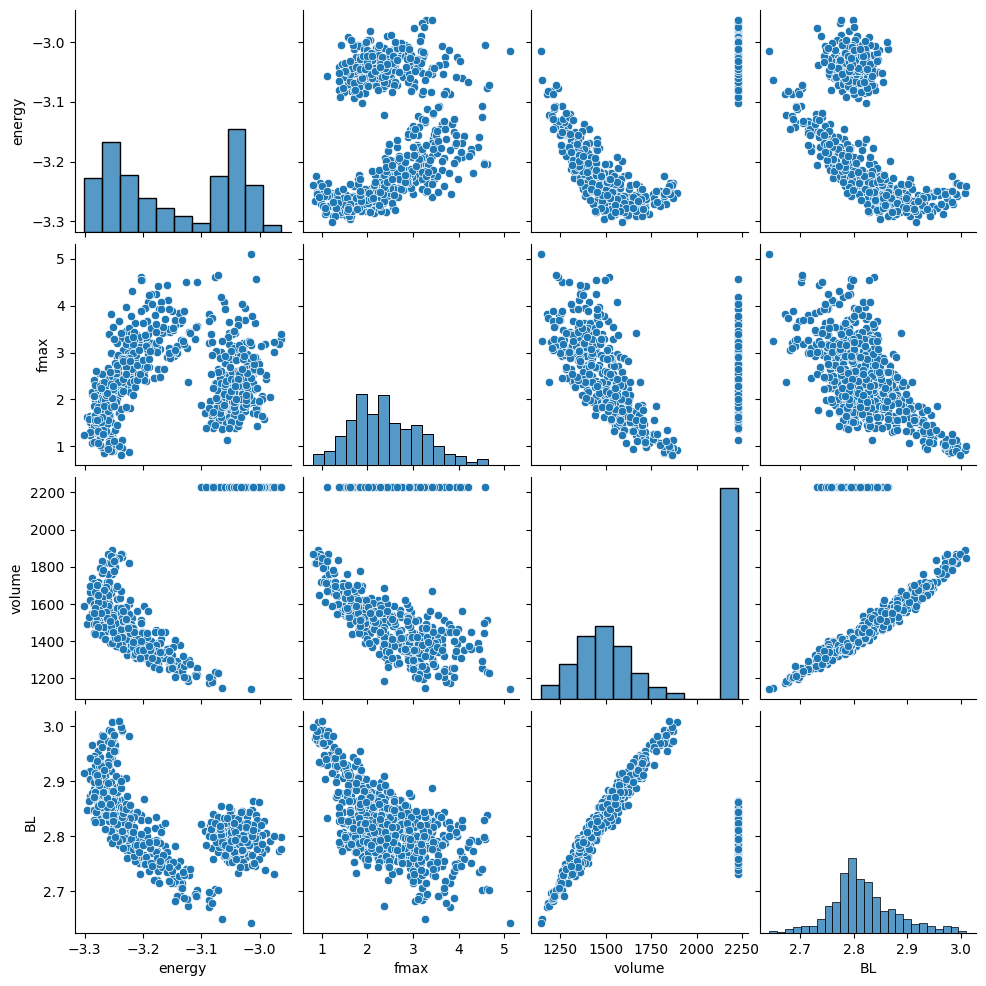

In [4]:
data=db.connect('DFT.db')

energy=[]; fmax=[]; formula=[]; BL=[]; volume=[]
df=pd.DataFrame()
for row in data.select():
  atoms=row.toatoms()
  formula.append(row.formula)
  energy.append(row.energy/len(atoms))
  fmax.append(row.fmax)
  volume.append(row.volume)
  ana = Analysis(atoms)
  Bonds = ana.get_bonds('Na', 'Cl', unique=True)
  BondValues = ana.get_values(Bonds)
  BL.append(np.average(BondValues))


df['formula']=formula
df['energy']=energy
df['fmax']=fmax
df['volume']=volume
df['BL']=BL
df
sns.pairplot(df)


In [5]:
df['volume'].unique()

array([2227.58399984, 1525.73175674, 1513.45214156, 1310.37725944,
       1256.23294915, 1471.578493  , 1853.54421001, 1527.92546258,
       1534.83801077, 1354.06480341, 1327.63923842, 1483.17044351,
       1448.04678238, 1563.89191724, 1450.63444282, 1349.62406678,
       1513.96950392, 1622.28194409, 1204.4316521 , 1554.38113935,
       1404.47364942, 1343.69087079, 1424.10636666, 1398.34542879,
       1240.16260231, 1325.86828389, 1430.40659803, 1312.68813216,
       1379.89860923, 1438.94053152, 1347.13337572, 1402.15301604,
       1533.2710727 , 1323.57911995, 1820.02336941, 1284.59885816,
       1520.9421653 , 1350.01385057, 1325.6037375 , 1363.31517541,
       1365.53767095, 1301.06051416, 1494.13557262, 1563.52049534,
       1266.62291567, 1258.04160034, 1588.26050771, 1317.94461837,
       1496.86923073, 1643.75490643, 1482.90911922, 1515.00657633,
       1820.76414106, 1772.52533676, 1393.09486582, 1443.8929977 ,
       1565.0773102 , 1572.55530402, 1292.22795951, 1537.62850

# Let us start with a smaller subset of the data.
To speed up the finding of the switching points, we start with a smaller subset of the data. Here, I want some data form the higher volume fraction and some from the lower ones.

In [7]:
os.mkdir('potential')
os.chdir('potential')

In [8]:
nu=pd.DataFrame({})
groups=['low', 'high']

for group in groups:
    if group == 'low':
        nums=np.random.randint(1,len(df.loc[df['volume']<2000]),50)
        nu[group]=nums
    if group == 'high':
        nums=np.random.randint(1,len(df.loc[df['volume']>2000]),50)
        nu[group]=nums

In [9]:
dw=db.connect('DFT_train.db')

In [25]:
!ase db ../DFT.db 'volume>2000'

id|age|user |formula |calculator|  energy|natoms| fmax|pbc|  volume|charge|    mass
 1| 8M|jolla|Na32Cl32|unknown   |-194.906|    64|2.308|TTT|2227.584| 0.000|1870.073
 2| 8M|jolla|Na32Cl32|unknown   |-195.845|    64|1.484|TTT|2227.584| 0.000|1870.073
 3| 8M|jolla|Na32Cl32|unknown   |-194.170|    64|2.512|TTT|2227.584| 0.000|1870.073
 4| 8M|jolla|Na32Cl32|unknown   |-194.284|    64|2.308|TTT|2227.584| 0.000|1870.073
 5| 8M|jolla|Na32Cl32|unknown   |-195.633|    64|2.526|TTT|2227.584| 0.000|1870.073
 6| 8M|jolla|Na32Cl32|unknown   |-195.698|    64|1.902|TTT|2227.584| 0.000|1870.073
 7| 8M|jolla|Na32Cl32|unknown   |-195.272|    64|1.895|TTT|2227.584| 0.000|1870.073
 8| 8M|jolla|Na32Cl32|unknown   |-197.251|    64|1.803|TTT|2227.584| 0.000|1870.073
 9| 8M|jolla|Na32Cl32|unknown   |-195.398|    64|2.407|TTT|2227.584| 0.000|1870.073
10| 8M|jolla|Na32Cl32|unknown   |-194.457|    64|2.602|TTT|2227.584| 0.000|1870.073
11| 8M|jolla|Na32Cl32|unknown   |-195.320|    64|2.089|TTT|2227.584| 0.000|1

98


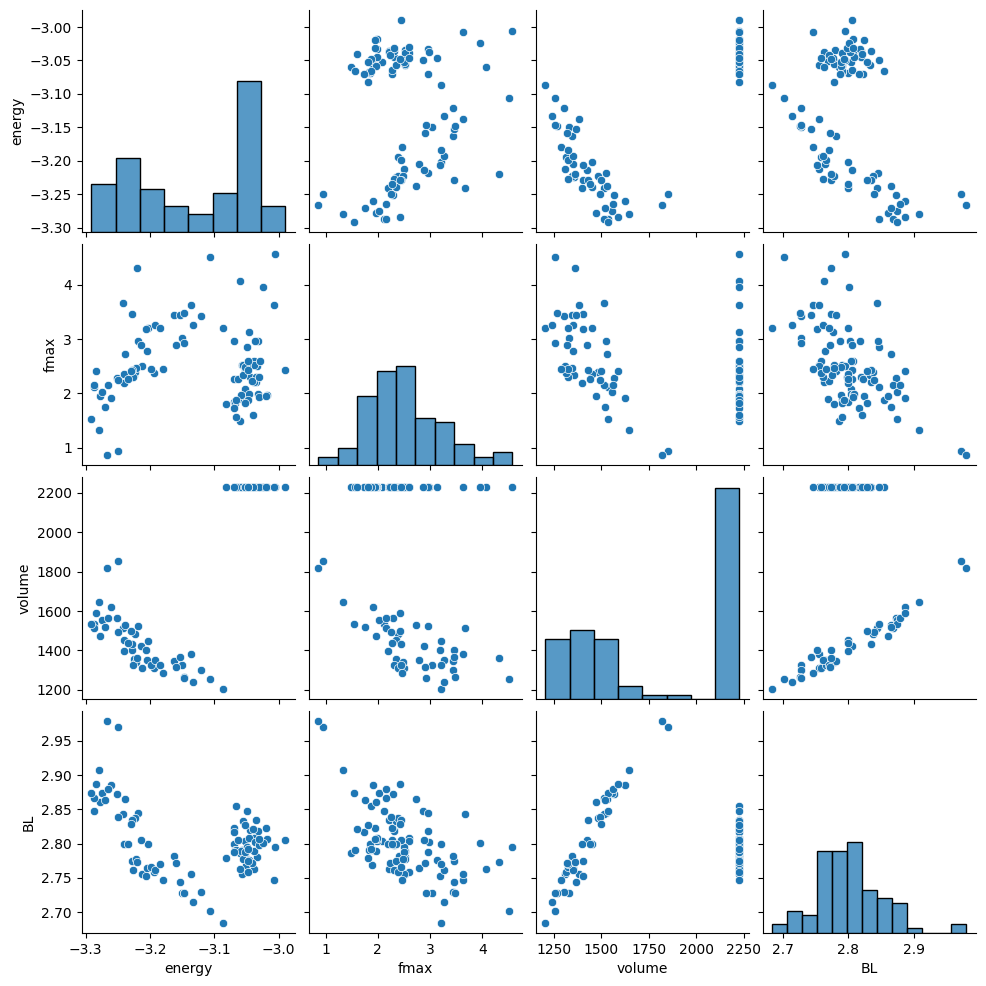

In [28]:
energy=[]; fmax=[]; formula=[]; BL=[]; volume=[]; ok=[]
data_train=pd.DataFrame({})

for group in groups:
    values=nu[group].sort_values()
    counter = 0
    if group == 'low':
        for row in data.select('volume>2000'):
            counter=counter+1
            if counter in values:
                atoms=row.toatoms()
                formula.append(row.formula)
                energy.append(row.energy/len(atoms))
                fmax.append(row.fmax)
                volume.append(row.volume)
                ana = Analysis(atoms)
                Bonds = ana.get_bonds('Na', 'Cl', unique=True)
                BondValues = ana.get_values(Bonds)
                BL.append(np.average(BondValues))
                dw.write(atoms)
    if group == 'high':
        for row in data.select('volume<2000'):
            counter=counter+1
            if counter in values:
                atoms=row.toatoms()
                formula.append(row.formula)
                energy.append(row.energy/len(atoms))
                fmax.append(row.fmax)
                volume.append(row.volume)
                ana = Analysis(atoms)
                Bonds = ana.get_bonds('Na', 'Cl', unique=True)
                BondValues = ana.get_values(Bonds)
                BL.append(np.average(BondValues))
                dw.write(atoms)

data_train['formula']=formula
data_train['energy']=energy
data_train['fmax']=fmax
data_train['volume']=volume
data_train['BL']=BL

sns.pairplot(data_train)
print(len(data_train))


In [29]:
!ase db DFT_train.db

id|age|formula |calculator|  energy|natoms| fmax|pbc|  volume|charge|    mass
 1|67m|Na32Cl32|unknown   |-206.021|    64|2.958|TTT|1525.732| 0.000|1870.073
 2|67m|Na32Cl32|unknown   |-207.454|    64|3.675|TTT|1513.452| 0.000|1870.073
 3|67m|Na32Cl32|unknown   |-205.613|    64|2.508|TTT|1310.377| 0.000|1870.073
 4|67m|Na32Cl32|unknown   |-198.825|    64|4.514|TTT|1256.233| 0.000|1870.073
 5|67m|Na32Cl32|unknown   |-209.778|    64|1.959|TTT|1471.578| 0.000|1870.073
 6|67m|Na32Cl32|unknown   |-208.019|    64|0.943|TTT|1853.544| 0.000|1870.073
 7|67m|Na32Cl32|unknown   |-207.255|    64|2.727|TTT|1527.925| 0.000|1870.073
 8|67m|Na32Cl32|unknown   |-210.355|    64|2.122|TTT|1534.838| 0.000|1870.073
 9|67m|Na32Cl32|unknown   |-206.353|    64|2.341|TTT|1354.065| 0.000|1870.073
10|67m|Na32Cl32|unknown   |-201.591|    64|3.031|TTT|1327.639| 0.000|1870.073
11|67m|Na32Cl32|unknown   |-206.267|    64|2.394|TTT|1483.170| 0.000|1870.073
12|67m|Na32Cl32|unknown   |-204.963|    64|3.210|TTT|1448.047| 0

# Fetch the data using ccs_fetch

In [30]:
from ccs_fit.scripts.ccs_fetch import ccs_fetch

q={"Na":1.0,"Cl":-1.0}
ccs_fetch(mode='CCS+Q', DFT_DB='DFT_train.db', charge_dict=q, include_forces=Fit_on_forces)


    Fetching data: 100%|██████████| 196/196 [01:01<00:00,  3.20it/s]


# Generate input
Here in the first attempt, we use a large value for `Resolution` to speed up thesearch for the switching point.

In [31]:
### Generate input.json file
import json

input={
    "General": {
        "interface": "CCS+Q",
        "merging"  : "True",
    },
    "Twobody": {
                "Cl-Na": {
                        "Rcut": 5.5,
                        "Resolution": 0.25,
                        "Swtype": "sw",
                        "const_type" : "Mono"
                },
                "Cl-Cl": {
                        "Rcut": 5.5,
                        "Resolution": 0.25,
                        "Swtype": "rep",
                        "const_type" : "Mono"
                },
                "Na-Na": {
                        "Rcut": 5.5,
                        "Resolution": 0.25,
                        "Swtype": "rep",
                        "const_type" : "Mono"
                }
        }
}
#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)

In [32]:
#RUN FIT
from ccs_fit import ccs_fit

ccs_fit("CCS_input.json")


    Generating one-body information from training-set.
        Added elements:  ['Cl', 'Na']
    Applying monotonic constraints for pair:  Cl-Na
    Applying monotonic constraints for pair:  Cl-Cl
    Applying monotonic constraints for pair:  Na-Na
    There is linear dependence in stochiometry matrix!
    Removing onebody term: Na


    Finding optimum switch: 100%|██████████| 16/16 [00:00<00:00, 87.75it/s]


    The best switch is (7, 13, 14) with rmse: 0.7818695543375506, corresponding to distances of [3.69 5.99 5.83] Å for element pairs ['Cl-Na', 'Cl-Cl', 'Na-Na'].


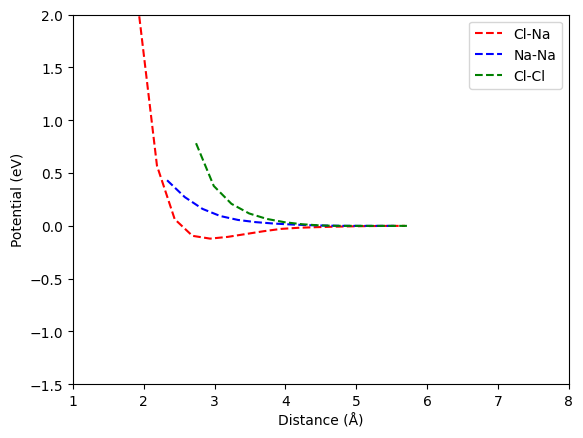

In [33]:
import numpy as np
import matplotlib.pyplot as plt

#with open("CCS_params_reference.json", "r") as f:
#    CCS_params_ref = json.load(f)

with open("CCS_params.json", "r") as f:
    CCS_params = json.load(f)

#r_ref = np.array(CCS_params_ref["Two_body"]["Ca-O"]["r"])
#e_ref = CCS_params_ref["Two_body"]["Ca-O"]["spl_a"]


r = np.array(CCS_params["Two_body"]["Cl-Na"]["r"])
e = CCS_params["Two_body"]["Cl-Na"]["spl_a"]
plt.plot(r,e,'--',color='red',label="Cl-Na")

r = np.array(CCS_params["Two_body"]["Na-Na"]["r"])
e = CCS_params["Two_body"]["Na-Na"]["spl_a"]
plt.plot(r,e,'--',color='b',label="Na-Na")

r = np.array(CCS_params["Two_body"]["Cl-Cl"]["r"])
e = CCS_params["Two_body"]["Cl-Cl"]["spl_a"]
plt.plot(r,e,'--',color='g',label="Cl-Cl")

plt.xlim(1.,8)
plt.ylim(-1.5,2.0)
plt.xlabel('Distance (Å)')
plt.ylabel('Potential (eV)')

plt.legend()
plt.show()

# second run with specified switching point.

In [34]:
### Generate input.json file
import json

input={
    "General": {
        "interface": "CCS+Q",
        "merging"  : "True",
    },
    "Twobody": {
                "Cl-Na": {
                        "Rcut": 5.5,
                        "Resolution": 0.02,
                        "Swtype": "sw",
                        "const_type" : "Mono",
                        "search_mode": "range",
                        "range_center": 2.3,
                        "range_width": 0.2
                },
                "Cl-Cl": {
                        "Rcut": 5.5,
                        "Resolution": 0.02,
                        "Swtype": "rep",
                        "const_type" : "Mono"
                },
                "Na-Na": {
                        "Rcut": 5.5,
                        "Resolution": 0.02,
                        "Swtype": "rep",
                        "const_type" : "Mono"
                }
        }
}
#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)

In [35]:
from ccs_fit import ccs_fit

ccs_fit("CCS_input.json")

    Generating one-body information from training-set.
        Added elements:  ['Cl', 'Na']
    Applying monotonic constraints for pair:  Cl-Na
    Applying monotonic constraints for pair:  Cl-Cl
    Applying monotonic constraints for pair:  Na-Na
    Merging intervals for pair Cl-Cl; number of intervals reduced from 134 to 131. 
    Merging intervals for pair Na-Na; number of intervals reduced from 154 to 145. 
    There is linear dependence in stochiometry matrix!
    Removing onebody term: Na
    Range search turned on for element pair Cl-Na; 10 possible switch indices in range of 2.09-2.49 Å.


    Finding optimum switch: 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]


    The best switch is (17, 131, 145) with rmse: 4.537840896285369, corresponding to distances of [2.39 5.47 5.34] Å for element pairs ['Cl-Na', 'Cl-Cl', 'Na-Na'].


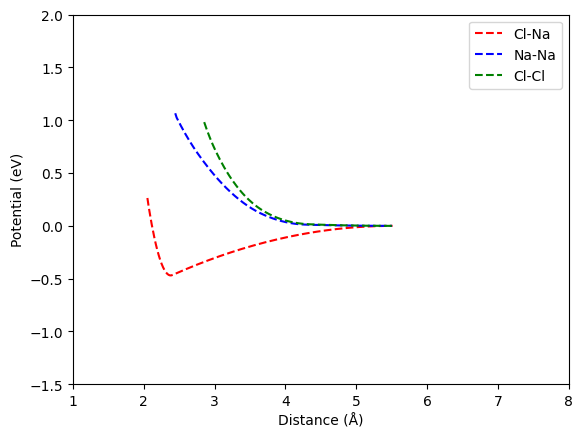

In [36]:
import numpy as np
import matplotlib.pyplot as plt

with open("CCS_params.json", "r") as f:
    CCS_params = json.load(f)


r = np.array(CCS_params["Two_body"]["Cl-Na"]["r"])
e = CCS_params["Two_body"]["Cl-Na"]["spl_a"]
plt.plot(r,e,'--',color='red',label="Cl-Na")

r = np.array(CCS_params["Two_body"]["Na-Na"]["r"])
e = CCS_params["Two_body"]["Na-Na"]["spl_a"]
plt.plot(r,e,'--',color='b',label="Na-Na")

r = np.array(CCS_params["Two_body"]["Cl-Cl"]["r"])
e = CCS_params["Two_body"]["Cl-Cl"]["spl_a"]
plt.plot(r,e,'--',color='g',label="Cl-Cl")

plt.xlim(1.,8)
plt.ylim(-1.5,2.0)
plt.xlabel('Distance (Å)')
plt.ylabel('Potential (eV)')

plt.legend()
plt.show()

# Validation

First, let's see how it performs for the training set



In [44]:
import ase.db as db
from ccs_fit.ase_calculator.ccs_ase_calculator import CCS
import pandas as pd
with open('CCS_params.json', 'r') as f:
    CCS_params=json.load(f)

df=db.connect('DFT_train.db')
model=[];DFT=[]
for row in df.select():
    struct=row.toatoms()
    nat=len(struct)
    struct.calc=CCS(CCS_params=CCS_params, q=q, charge_scaling=True)
    model.append(struct.get_total_energy()/nat)
    DFT.append(row.energy/nat)
check=pd.DataFrame({'model':model, 'DFT':DFT})

/usr/local/lib/python3.10/dist-packages/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.rank instead
  warnings.warn(warning)


ValueError: ignored

In [ ]:
sns.lmplot(x='model', y='DFT',data=check,fit_reg=True)


In [ ]:
sns.residplot(x='model', y='DFT',data=check)

The same data is already computed by `ccs`

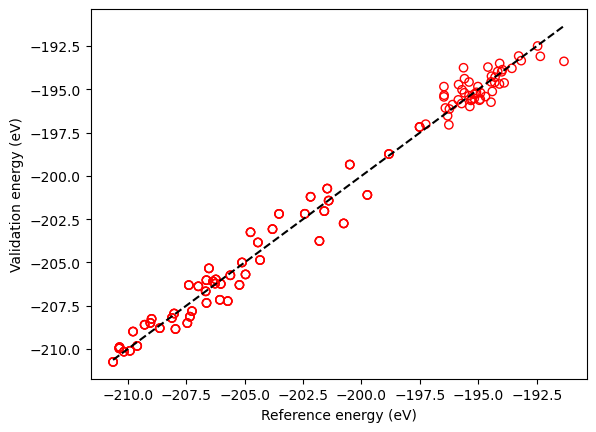

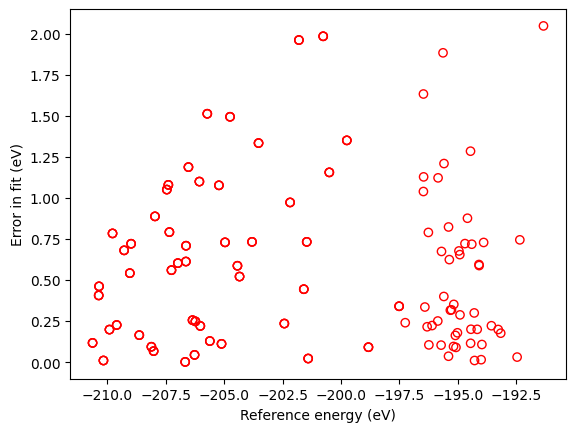

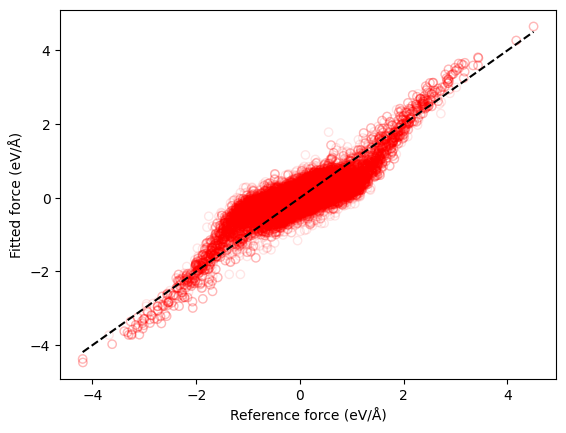

In [45]:
err=np.loadtxt("CCS_error.out")
plt.xlabel('Reference energy (eV)')
plt.ylabel('Validation energy (eV)')
plt.plot( [min(err[:,0]),max(err[:,0])],[min(err[:,0]),max(err[:,0])],'--',color='black'  )
plt.scatter(err[:,0],err[:,1],facecolors='none', edgecolors='red')
plt.show()
plt.xlabel('Reference energy (eV)')
plt.ylabel('Error in fit (eV)')
plt.scatter(err[:,0],err[:,2],facecolors='none', edgecolors='red')
plt.show()


try:
    err_F=np.loadtxt("CCS_error_forces.out")
    plt.xlabel('Reference force (eV/Å)')
    plt.ylabel('Fitted force (eV/Å)')
    plt.plot( [min(err_F[:,0]),max(err_F[:,0])],[min(err_F[:,0]),max(err_F[:,0])],'--',color='black')
    plt.scatter(err_F[:,0],err_F[:,1],facecolors='none', edgecolors='red',alpha=0.1 )
    plt.show()
except:
    pass



This is for the data we have trained on... what about the data we have not trained on.

In [46]:
from ase import db
from ccs_fit.ase_calculator.ccs_ase_calculator import CCS
import pandas as pd
with open('CCS_params.json', 'r') as f:
    CCS_params=json.load(f)

db=db.connect('../DFT.db')
model=[];DFT=[]
for row in db.select():
    struct=row.toatoms()
    nat=len(struct)
    struct.calc=CCS(CCS_params=CCS_params, q=q, charge_scaling=True)
    model.append(struct.get_total_energy()/nat)
    DFT.append(row.energy/nat)
check_val=pd.DataFrame({'model':model, 'DFT':DFT})

ValueError: ignored

In [ ]:
sns.lmplot(x='model', y='DFT',data=check,fit_reg=True)
sns.lmplot(x='model', y='DFT',data=check_val,fit_reg=True)


In [ ]:
sns.residplot(x='model', y='DFT',data=check)
sns.residplot(x='model', y='DFT',data=check_val)

Can we do better? probably... try to add more data and rerun.

# Running MD with PPMD - fast MD with full Ewald...



In [47]:
%%capture
!pip install --upgrade --no-cache-dir git+https://github.com/ppmd/ppmd@master



In [49]:
os.chdir(base)
os.mkdir('PPMD')
os.chdir('PPMD')

In [50]:
from ase.io import Trajectory,read, write
import json

from ccs_fit.ppmd_interface import ccs_ppmd
from ppmd.state import State

In [52]:
A = State()
atoms=read("../DFT.db@10")

############################
### SET UP THE CCS CLASS ###
q={"Na":1.0,"Cl":-1.0}
CCS = ccs_ppmd.CCS(A,atoms,q=q,CCS_params='../potential/CCS_params.json')
atoms_out= ccs_ppmd.optimize(A,atoms,CCS,Fmax=1.0)

SWITHING OF +Q.
------------------------------- OPTIMIZATION COMPLETE -------------------------------
    Total time for opimization:  4.692230939865112  s, Max force: 0.731803147728249 ev/Å
